Notebook to review the trained model running in inference mode.

In [1]:
import os
import sys
import time
import numpy as np
import tensorflow as tf

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")
sys.path.append(ROOT_DIR)

import balloon
from mrcnn.config import Config
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

# show visible GPU devices and limit the memory growth
print('List physical GPU devices:')
gpu_devices = tf.config.list_physical_devices('GPU')
for gpu in gpu_devices: 
    print(' '*3, gpu)
    try:
        tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as error:
        print(error)

List physical GPU devices:
    PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## Define trained configurations
TODO: load from stored config file

In [2]:
class InferenceConfig(Config):
    NAME = "balloon"
    NUM_CLASSES = 1 + 1  # Background + balloon
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    USE_MINI_MASK = False
    RUN_EAGERLY = False

config = InferenceConfig()

## Load Validation Dataset

In [3]:
# Load validation dataset
val_path = os.path.join(ROOT_DIR, "data", "balloon")
dataset = balloon.BalloonDataset()
dataset.load_balloon(val_path, "val")

# Must call before using the dataset
dataset.prepare()
print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 13
Classes: ['BG', 'balloon']


## Load Model

In [4]:
weights_path = os.path.join(ROOT_DIR, "model_logs", "balloon20221110T1256", "mask_rcnn_balloon_0012.h5")

# create inference model
model = modellib.MaskRCNN(mode="inference", model_dir="/home", config=config)
    
print("Loading weights:", weights_path)
model.load_weights(weights_path, by_name=True)
model.keras_model.compile(run_eagerly=config.RUN_EAGERLY)

Instructions for updating:
Use fn_output_signature instead
Loading weights: /home/ai/dev/model_logs/balloon20221110T1256/mask_rcnn_balloon_0012.h5
Re-starting from epoch 12


## Run Detection

Processing image_id:4
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


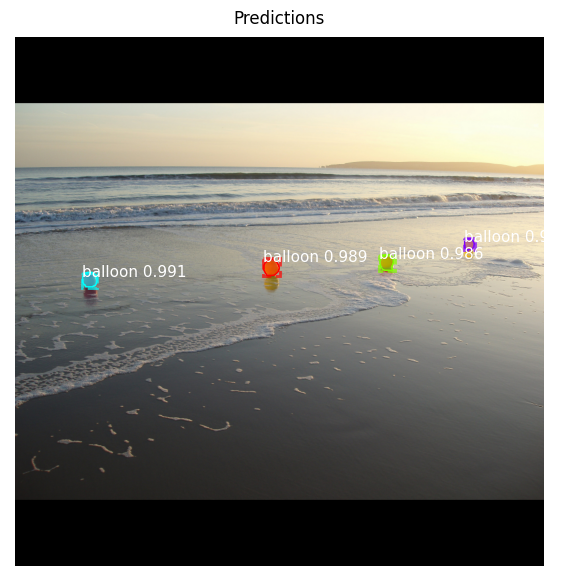

In [10]:
# for image_id in dataset.image_ids:
image_id = np.random.choice(dataset.image_ids)
print(f"Processing image_id:{image_id}")

image, image_meta, gt_class_id, gt_bbox, gt_masks =\
    modellib.load_image_gt(dataset, config, image_id)
info = dataset.image_info[image_id]

results = model.detect([image], verbose=1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'],
                            title="Predictions", figsize=(7,7))